In [1]:
!pip install pydicom

     ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
     - -------------------------------------- 0.1/2.0 MB 4.1 MB/s eta 0:00:01
     ---- ----------------------------------- 0.2/2.0 MB 2.5 MB/s eta 0:00:01
     ------- -------------------------------- 0.3/2.0 MB 2.7 MB/s eta 0:00:01
     ---------- ----------------------------- 0.5/2.0 MB 2.6 MB/s eta 0:00:01
     -------------- ------------------------- 0.7/2.0 MB 3.1 MB/s eta 0:00:01
     ------------------ --------------------- 0.9/2.0 MB 3.3 MB/s eta 0:00:01
     ---------------------- ----------------- 1.1/2.0 MB 3.4 MB/s eta 0:00:01
     -------------------------- ------------- 1.3/2.0 MB 3.5 MB/s eta 0:00:01
     ------------------------------- -------- 1.5/2.0 MB 3.6 MB/s eta 0:00:01
     --------------------------------- ------ 1.7/2.0 MB 3.5 MB/s eta 0:00:01
     ------------------------------------- -- 1.8/2.0 MB 3.6 MB/s eta 0:00:01
     ---------------------------------------- 2.0/2.0 MB 3.6 MB/s eta 0

In [2]:
!pip install tkinter

ERROR: Could not find a version that satisfies the requirement tkinter (from versions: none)
ERROR: No matching distribution found for tkinter


In [3]:
!pip install PIL

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [9]:
# AGH UST Medical Informatics 03.2021
# Lab 2 : DICOM

import pydicom
from tkinter import *
from PIL import Image, ImageTk
import numpy as np

# ZADANIE 1A
# ...

# def __init__(self, main):
#     #todo: from ds get windowWidth and windowCenter
#     self.window_width = self.ds.WindowWidth
#     self.window_center = self.ds.WindowCenter
#     self.pixel_spacing = self.ds.PixelSpacing

#     # ...

#     # todo: apply transform
#     self.array = self.transform_data(self.data, self.window_width, self.window_center)


# # ...

# # todo: transform data (apply window width and center)
# def transform_data(self, data, window_width, window_center):
#     old_center = (np.max(data) - np.min(data))/2 + np.min(data)
#     old_width = np.max(data) - np.min(data)
#     data = ((data - old_center) * (window_width / old_width)) + window_center

# # ...

# # todo: modify window width and center
# def update_window(self, event):
#     print("x: " + str(event.x) + " y: " + str(event.y))
#     self.array2 = self.transform_data(self.data, event.x, event.y)
#     self.image2 = Image.fromarray(self.array2)
#     self.image2 = self.image2.resize((512, 512), Image.ANTIALIAS)
#     self.img2 = ImageTk.PhotoImage(image=self.image2, master=root)
#     self.canvas.itemconfig(self.image_on_canvas, image=self.img2)

# # ...


# ## =========


class MainWindow():

    ds = pydicom.dcmread("head.dcm")
    data = ds.pixel_array

    def __init__(self, main):
        # print patient name
        print(self.ds.PatientName)
        #todo: from ds get windowWidth and windowCenter
        self.window_width = self.ds.WindowWidth
        self.window_center = self.ds.WindowCenter
        self.pixel_spacing = self.ds.PixelSpacing
        print('window_width ' + str(self.window_width) + ' window_center ' + str(self.window_center))
        print('pixel_spacing: ', self.pixel_spacing)
        print(self.data.shape)
        # prepare canvas
        self.canvas = Canvas(main, width=512, height=512)
        self.canvas.grid(row=0, column=0)
        self.canvas.bind("<Button-1>", self.init_window)
        self.canvas.bind("<B1-Motion>", self.update_window)
        self.canvas.bind("<Button-3>", self.init_measurement)
        self.canvas.bind("<B3-Motion>", self.update_measurement)
        self.canvas.bind("<ButtonRelease-3>", self.finish_measurement)
        self.line = self.canvas.create_line(0, 0, 0, 0)

        # load image
        # todo: apply transform
        self.array = self.transform_data(self.data, self.window_width, self.window_center)
        # self.array = self.data
        self.image = Image.fromarray(self.array)
        self.image = self.image.resize((512, 512), Image.ANTIALIAS)
        self.img = ImageTk.PhotoImage(image=self.image, master=root)
        self.image_on_canvas = self.canvas.create_image(0, 0, anchor=NW, image=self.img)

    def transform_data(self, data, window_width, window_center):
        # todo: transform data (apply window width and center)
        old_center = (np.max(data) - np.min(data))/2 + np.min(data)
        old_width = np.max(data) - np.min(data)
        data = ((data - old_center) * (window_width / old_width)) + window_center
        return data

    def init_window(self, event):
        # todo: save mouse position
        print("x: " + str(event.x) + " y: " + str(event.y))

    def update_window(self, event):
        # todo: modify window width and center
        print("x: " + str(event.x) + " y: " + str(event.y))
        self.array2 = self.transform_data(self.data, event.x, event.y)
        self.image2 = Image.fromarray(self.array2)
        self.image2 = self.image2.resize((512, 512), Image.ANTIALIAS)
        self.img2 = ImageTk.PhotoImage(image=self.image2, master=root)
        self.canvas.itemconfig(self.image_on_canvas, image=self.img2)

    def init_measurement(self, event):
        # todo: save mouse position
        # todo: create line
        # hint: self.canvas.create_line(...)
        self.line = self.canvas.create_line(event.x, event.y, event.x, event.y, width=5, fill='red')
        print("x: " + str(event.x) + " y: " + str(event.y))

    def update_measurement(self, event):
        # todo: update line
        # hint: self.canvas.coords(...)
        self.canvas.coords(self.line, self.canvas.coords(self.line)[0], self.canvas.coords(self.line)[1], event.x, event.y)
        print("x: " + str(event.x) + " y: " + str(event.y))

    def finish_measurement(self, event):
        # todo: print measured length in mm
        x1, y1, x2, y2 = self.canvas.coords(self.line)
        line_len = np.sqrt(((x2-x1)*self.pixel_spacing[0])**2 + ((y2-y1)*self.pixel_spacing[1])**2)
        print('Measured length: ' + str(line_len) + 'mm')



#----------------------------------------------------------------------

root = Tk()
MainWindow(root)
root.mainloop()


PATIENT2
window_width 958 window_center 479
pixel_spacing:  [0.937500, 0.937500]
(256, 256)


C:\Users\Alicja\AppData\Local\Temp\ipykernel_23296\1967896949.py:79: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  self.image = self.image.resize((512, 512), Image.ANTIALIAS)


x: 482 y: 389
x: 481 y: 379
x: 479 y: 367
x: 476 y: 349
x: 475 y: 344
x: 474 y: 337
x: 474 y: 335
x: 473 y: 333
x: 473 y: 332
x: 473 y: 331
x: 473 y: 330
x: 473 y: 329


C:\Users\Alicja\AppData\Local\Temp\ipykernel_23296\1967896949.py:99: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  self.image2 = self.image2.resize((512, 512), Image.ANTIALIAS)


x: 473 y: 328
x: 473 y: 327
x: 473 y: 326
x: 473 y: 325
x: 473 y: 324
x: 473 y: 323
x: 473 y: 322
x: 472 y: 321
x: 472 y: 320
x: 472 y: 319
x: 472 y: 318
x: 472 y: 317
x: 472 y: 316
x: 472 y: 315
x: 472 y: 314
x: 472 y: 313
x: 472 y: 311
x: 472 y: 309
x: 471 y: 306
x: 471 y: 303
x: 470 y: 301
x: 470 y: 297
x: 469 y: 293
x: 469 y: 288
x: 469 y: 286
x: 468 y: 283
x: 467 y: 281
x: 467 y: 277
x: 466 y: 273
x: 466 y: 270
x: 465 y: 269
x: 465 y: 265
x: 464 y: 264
x: 464 y: 260
x: 464 y: 258
x: 463 y: 256
x: 462 y: 254
x: 462 y: 252
x: 461 y: 250
x: 460 y: 249
x: 460 y: 247
x: 460 y: 245
x: 459 y: 243
x: 459 y: 242
x: 458 y: 241
x: 458 y: 239
x: 458 y: 238
x: 458 y: 237
x: 457 y: 236
x: 457 y: 235
x: 457 y: 234
x: 457 y: 233
x: 457 y: 232
x: 457 y: 231
x: 457 y: 230
x: 457 y: 229
x: 457 y: 228
x: 457 y: 227
x: 457 y: 226
x: 456 y: 225
x: 456 y: 224
x: 456 y: 223
x: 456 y: 222
x: 456 y: 221
x: 456 y: 220
x: 456 y: 219
x: 456 y: 218
x: 456 y: 217
x: 456 y: 216
x: 456 y: 215
x: 456 y: 214
x: 455

[257, 351]
Press any key to close the window.
(257, 351)


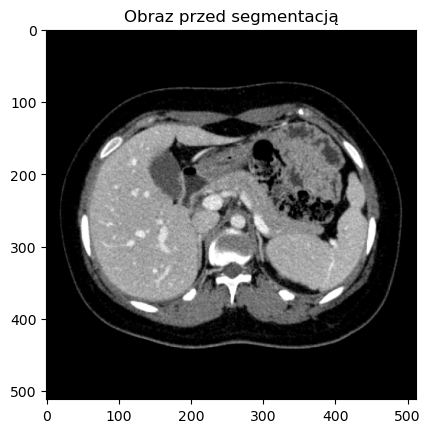

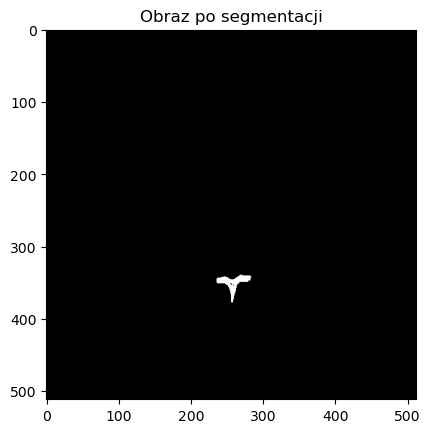

In [16]:
# AGH UST Medical Informatics 03.2021
# Lab 2 : Segmentation

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

im = cv.imread('abdomen.png')
im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
w, h = im.shape

chosen_coordinates = None

mask = np.zeros([h,w], np.uint8)

def mouse_callback(event, x, y, flags, params):
    global chosen_coordinates
    if event == 1:
        print([x, y])
        print("Press any key to close the window.")
        chosen_coordinates = (x, y)
        
    

def choose_coordinates():
    cv.imshow('image', im)
    cv.setMouseCallback('image', mouse_callback)
    cv.waitKey()
    cv.destroyAllWindows()



def segmentation(threshold = 10, con_size = 3):

    choose_coordinates()
    print(chosen_coordinates)
    x, y = chosen_coordinates

    visited = np.zeros((w, h))
    segmented = np.zeros((w, h))

    stack = []
    stack.append((x, y))
    visited[x, y] = 1
    segmented[x, y] = im[x, y] 

    while len(stack):
        r, c = stack.pop()
        if (r == 0 or r == w - 1) and (c == 0 or c == h - 1):
            continue
        for i in range(r - con_size//2, r + con_size//2 + 1):
            for j in range(c - con_size//2, c + con_size//2 + 1):
                if visited[i, j] == 0 and abs(int(im[i, j]) - int(im[r, c])) < threshold:
                    stack.append((i, j))
                    segmented[i, j] = im[i, j]
                visited[i, j] = 1                 
    return segmented



def segmentation_advanced(threshold, con_size = 3):

    choose_coordinates()
    print(chosen_coordinates)
    y, x = chosen_coordinates

    visited = np.zeros((w, h))
    segmented = np.zeros((w, h))

    stack = []
    stack.append((x, y))
    visited[x, y] = 1
    segmented[x, y] = im[x, y] 
    
    counter = 0
    medium = 0
    while len(stack) > 0:
        r, c = stack.pop()
        counter += 1
        medium = ((medium * (counter - 1)) + im[x, y])/ counter
        if (r == 0 or r == w - 1) and (c == 0 or c == h - 1):
            continue
        for i in range(r - con_size//2, r + con_size//2 + 1):
            for j in range(c - con_size//2, c + con_size//2 + 1):
                if visited[i, j] == 0 and abs(int(im[i, j]) - int(medium)) < threshold:
                    stack.append((i, j))
                    segmented[i, j] = im[i, j]
                visited[r, c] = 1     
    return segmented                


if __name__ == "__main__":
    # segmented = segmentation(threshold=11)
    segmented = segmentation_advanced(threshold = 30)
    
    plt.imshow(im, cmap = 'gray')
    plt.title("Obraz przed segmentacją")
    plt.show()

    plt.imshow(segmented, cmap = 'gray')
    plt.title("Obraz po segmentacji")
    plt.show()


In [11]:
!pip install opencv-python

     ---------------------------------------- 0.0/38.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.2 MB 2.0 MB/s eta 0:00:19
     ---------------------------------------- 0.1/38.2 MB 1.4 MB/s eta 0:00:27
     ---------------------------------------- 0.2/38.2 MB 1.5 MB/s eta 0:00:26
     ---------------------------------------- 0.3/38.2 MB 1.7 MB/s eta 0:00:22
     ---------------------------------------- 0.4/38.2 MB 1.8 MB/s eta 0:00:21
      --------------------------------------- 0.5/38.2 MB 2.0 MB/s eta 0:00:19
      --------------------------------------- 0.6/38.2 MB 1.8 MB/s eta 0:00:21
      --------------------------------------- 0.7/38.2 MB 1.9 MB/s eta 0:00:20
      --------------------------------------- 0.9/38.2 MB 2.0 MB/s eta 0:00:19
      --------------------------------------- 0.9/38.2 MB 2.0 MB/s eta 0:00:19
     - -------------------------------------- 1.0/38.2 MB 1.9 MB/s eta 0:00:20
     - -------------------------------------- 1.2/38.2 MB 2